# Creating a dataframe

In [33]:
import numpy as np
import pandas as pd

list_obj = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars']
list_dist = [0, 69817445, 108942780, 152098233, 249232432]
list_radius = [696340, 2440, 6052, 6371, 3390, ]

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'aphelion', 'radius'])
df_obj

,object,aphelion,radius
0,Sun,0,696340
1,Mercury,69817445,2440
2,Venus,108942780,6052
3,Earth,152098233,6371
4,Mars,249232432,3390


In [34]:
#light speed in meter/second  converted to kilometer/minute
c = 299792458
c_kmm = (c/1000)*60 

#calculate time in minutes
max_dist = df_obj['aphelion'].max()
n_times = max_dist/c_kmm

#turn ntimes in an integer + 2 minutes (starting at minutue 0 and 1 minnute after)
mins = int(n_times)+2

#calculate a list with light distance at each minute
light_dist = [i*c_kmm for i in range(0, mins)]

In [35]:
#concat dataframe with the number of times 
df_con = pd.concat([df_obj]*mins)

#create a time column to assign time for plotting
n_object = len(df_obj)
df_con['minutes'] = sum([[i]*n_object for i in range(0,mins)],[])

#create a Y_axis column to work with scatter plot 
df_con['Y_axis'] = [0]*len(df_con)
df_con.head()

,object,aphelion,radius,minutes,Y_axis
0,Sun,0,696340,0,0
1,Mercury,69817445,2440,0,0
2,Venus,108942780,6052,0,0
3,Earth,152098233,6371,0,0
4,Mars,249232432,3390,0,0


In [36]:
light_size = df_con['radius'].median()
df_light = pd.DataFrame(zip(['Light']*mins,
                            light_dist,
                            [light_size]*mins,
                            range(0,mins),
                            [0.1]*mins),
                        columns = df_con.columns)
df_light.head()

,object,aphelion,radius,minutes,Y_axis
0,Light,0.00,6052.0,0,0.1
1,Light,17987547.48,6052.0,1,0.1
2,Light,35975094.96,6052.0,2,0.1
3,Light,53962642.44,6052.0,3,0.1
4,Light,71950189.92,6052.0,4,0.1


In [37]:
#concat df_con and df_light
df_plot = pd.concat([df_con, df_light], axis=0)
df_plot.sort_values(by = ['minutes'], inplace=True)
df_plot.reset_index(drop=True, inplace=True)

#calculate Scatter Area
Area = [np.pi*(i**2) for i in list(df_plot['radius'])]
df_plot['area'] = Area
df_plot.head()


,object,aphelion,radius,minutes,Y_axis,area
0,Sun,0.0,696340.0,0,0.0,1.523325e+12
1,Mars,249232432.0,3390.0,0,0.0,3.610350e+07
2,Earth,152098233.0,6371.0,0,0.0,1.275161e+08
3,Light,0.0,6052.0,0,0.1,1.150662e+08
4,Mercury,69817445.0,2440.0,0,0.0,1.870379e+07


In [38]:
#modify other scatter sizes since the sun is too huge
sun_st = df_plot['area'].max()
Area_mod = [i if i >= sun_st*0.9 else i*500 for i in list(df_plot['area'])]
df_plot['area_mod'] = Area_mod

#create a column with distance in the AU unit
au = 149597871
df_plot['AU'] = [i/au for i in df_plot.aphelion]

#create a text column for annotation
keep_text = []
for e,s,a,m in zip(df_plot.object, df_plot.aphelion, df_plot.AU, df_plot.minutes):
    if e not in ['Sun', 'Light']:
        keep_text.append(e+'<br>'+str(round(s/c_kmm,2))+' m'+'<br>'+str(round(a,1))+' AU')
    elif e == 'Light':
        keep_text.append(e+'<br>'+str(m)+' m')
    else:
        keep_text.append(e)

df_plot['text'] = keep_text
df_plot.head()

,object,aphelion,radius,minutes,Y_axis,area,area_mod,AU,text
0,Sun,0.0,696340.0,0,0.0,1.523325e+12,1.523325e+12,0.000000,Sun
1,Mars,249232432.0,3390.0,0,0.0,3.610350e+07,1.805175e+10,1.666016,Mars<br>13.86 m<br>1.7 AU
2,Earth,152098233.0,6371.0,0,0.0,1.275161e+08,6.375806e+10,1.016714,Earth<br>8.46 m<br>1.0 AU
3,Light,0.0,6052.0,0,0.1,1.150662e+08,5.753309e+10,0.000000,Light<br>0 m
4,Mercury,69817445.0,2440.0,0,0.0,1.870379e+07,9.351893e+09,0.466701,Mercury<br>3.88 m<br>0.5 AU


# Visualization using Plotly

In [39]:
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object",
                 size = "area_mod", animation_frame="minutes",
                 hover_name="object", text = "text",
                 range_x=[df_plot['aphelion'].min()-df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.032],
                 range_y=[-0.2, 0.25],
                 labels={"aphelion":"Distance(km)"},
                )
fig.update_traces(textposition='bottom center')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 360
fig.show()

In [40]:
dict_colors = {'Sun':'#FFC404', 'Light':'white',
               'Mercury':'#BeBeBe', 'Venus':'#F9AB46', 
               'Earth':'#0494cc', 'Mars':'#D14734', 
               'Jupiter':'#FE9C37', 'Saturn':'#FDA369', 
               'Uranus':'#3B97B6', 'Neptune':'#1a5fa1'}


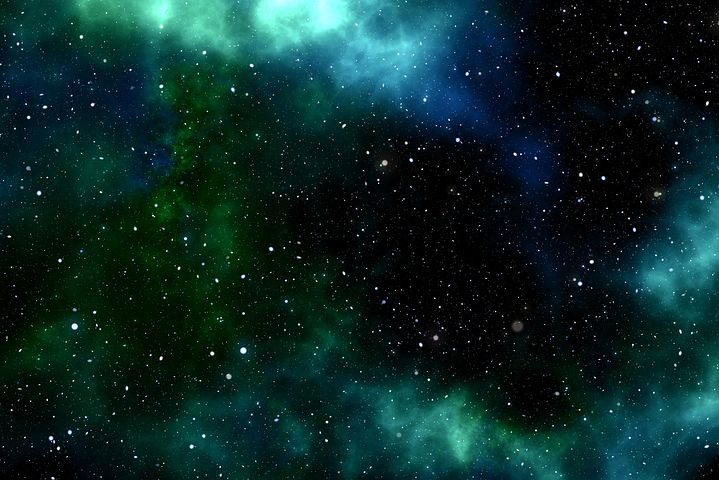

In [41]:
import base64
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object",
                 size = "area_mod", animation_frame="minutes",
                 hover_name="object", text = "text",
                 range_x=[df_plot['aphelion'].min()-df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.04],
                 range_y=[-0.2, 0.25],
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"aphelion": "Distance(km)"}
                )
#update text and marker lines
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1, line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'stars.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 360
fig.show()

In [42]:
list_obj = ['Sun', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
list_dist = [0, 816001807, 1503509229, 3006318143, 4537039826]
list_radius = [696340, 69911, 58232, 25362, 24622 ]

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'aphelion', 'radius'])
df_obj

,object,aphelion,radius
0,Sun,0,696340
1,Jupiter,816001807,69911
2,Saturn,1503509229,58232
3,Uranus,3006318143,25362
4,Neptune,4537039826,24622


### Define a function to simplify the steps to get a DataFrame for plotting.

In [43]:
# Define a function to simplify the steps to get a DataFrame for plotting.
def get_plot(df_obj, c_light, dist_col, timeout_col, light_size):
    max_dist = df_obj[dist_col].max()
    n_times = max_dist/c_light
    
    times = int(n_times)+2
    light_dist = [i*c_light for i in range(0, times)]
    
    n_object = len(df_obj)
    df_con = pd.concat([df_obj]*times)
    df_con[timeout_col] = sum([[i]*n_object for i in range(0,times)],[])
    df_con['Y_axis'] = [0]*len(df_con)
    
    #df light
    light_size = df_con['radius'].median()*light_size
    df_light = pd.DataFrame(zip(['Light']*times,
                                light_dist,
                                [light_size]*times,
                                range(0,times),
                                [0.1]*times),
                            columns = df_con.columns)
    df_plot = pd.concat([df_con, df_light], axis=0)
    df_plot.sort_values(by = [timeout_col], inplace=True)
    df_plot.reset_index(drop=True, inplace=True)
    
    #calculate size
    area = [np.pi*(i**2) for i in list(df_plot['radius'])]
    df_plot['area'] = area
    
    #calculate AU
    au = 149597871
    df_plot['AU'] = [i/au for i in df_plot[dist_col]]
    
    return df_plot

In [44]:
df_plot = get_plot(df_obj, c_kmm, 'aphelion', 'minutes', 1)
df_plot.head()

,object,aphelion,radius,minutes,Y_axis,area,AU
0,Sun,0.000000e+00,696340.0,0,0.0,1.523325e+12,0.000000
1,Neptune,4.537040e+09,24622.0,0,0.0,1.904568e+09,30.328238
2,Uranus,3.006318e+09,25362.0,0,0.0,2.020770e+09,20.095996
3,Light,0.000000e+00,58232.0,0,0.1,1.065303e+10,0.000000
4,Jupiter,8.160018e+08,69911.0,0,0.0,1.535468e+10,5.454635


In [45]:
#deal with the size
sun_s_area = df_plot['area'].max()
Area_mod = [i if i >= sun_s_area*0.9 else i*10 for i in list(df_plot['area'])]
df_plot['area_mod'] = Area_mod

#create a text column for annotation 
keep_text = []
for e,s,a,m in zip(df_plot.object, df_plot.aphelion, df_plot.AU, df_plot.minutes):
    if e not in ['Sun', 'Light']:  #<br> for new line in HTML
        keep_text.append(e +'<br>'+str(round(s/c_kmm,2))+' m'+'<br>'+str(round(a,1))+' AU')
    elif e == 'Light':
        keep_text.append(e + '<br>' + str(m) + ' m')
    else:
        keep_text.append(e)

df_plot['text'] = keep_text
df_plot.sort_values(by=['object','minutes'], inplace=True)
df_plot.head()

,object,aphelion,radius,minutes,Y_axis,area,AU,area_mod,text
4,Jupiter,816001807.0,69911.0,0,0.0,1.535468e+10,5.454635,1.535468e+11,Jupiter<br>45.36 m<br>5.5 AU
7,Jupiter,816001807.0,69911.0,1,0.0,1.535468e+10,5.454635,1.535468e+11,Jupiter<br>45.36 m<br>5.5 AU
15,Jupiter,816001807.0,69911.0,2,0.0,1.535468e+10,5.454635,1.535468e+11,Jupiter<br>45.36 m<br>5.5 AU
22,Jupiter,816001807.0,69911.0,3,0.0,1.535468e+10,5.454635,1.535468e+11,Jupiter<br>45.36 m<br>5.5 AU
29,Jupiter,816001807.0,69911.0,4,0.0,1.535468e+10,5.454635,1.535468e+11,Jupiter<br>45.36 m<br>5.5 AU


### Visualize the data


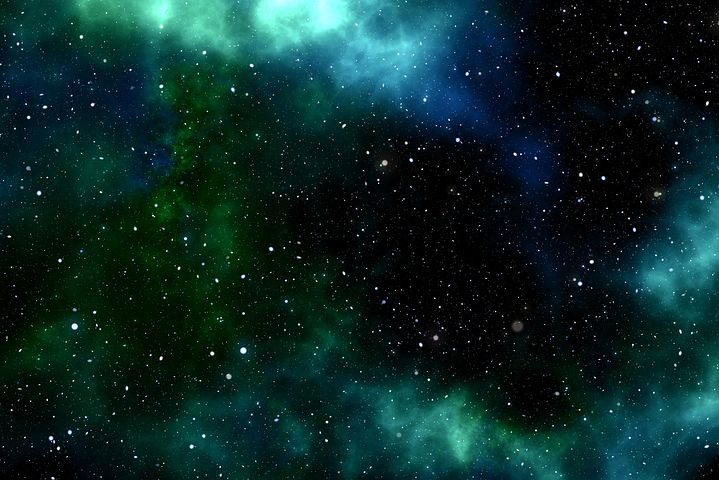

In [46]:
import base64
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object",
                 size = "area_mod",
                 animation_frame="minutes", hover_name="object", text = "text",
                 size_max = 30,
                 range_x=[df_plot['aphelion'].min() - df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.1],
                 range_y=[-0.2, 0.25],
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"aphelion": "Distance(km)"}
                )
#update text and marker lines
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1,
                              line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'stars.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 20
fig.show()

### Plotting for the farthest object to the sun: [Far Far Out](https://en.wikipedia.org/wiki/2018_AG37)

In [47]:
list_obj = ['Sun', 'Neptune', 'FarFarOut']
list_dist = [0, 4537039826, 20958661727]
list_radius = [696340, 24622, 200]

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'aphelion', 'radius'])
df_obj

,object,aphelion,radius
0,Sun,0,696340
1,Neptune,4537039826,24622
2,FarFarOut,20958661727,200


In [48]:
c = 299792458
c_kmh = (c/1000)*(60*60)       #light speed in km/h   >>   kilometer/hour

df_plot = get_plot(df_obj, c_kmh, 'aphelion', 'hours', 1.1)
df_plot.head()

,object,aphelion,radius,hours,Y_axis,area,AU
0,Sun,0.000000e+00,696340.0,0,0.0,1.523325e+12,0.000000
1,FarFarOut,2.095866e+10,200.0,0,0.0,1.256637e+05,140.100000
2,Light,0.000000e+00,27084.2,0,0.1,2.304528e+09,0.000000
3,Neptune,4.537040e+09,24622.0,0,0.0,1.904568e+09,30.328238
4,Sun,0.000000e+00,696340.0,1,0.0,1.523325e+12,0.000000


In [49]:
sun_s_area = df_plot['area'].max()

Area_mod = [i if i >= sun_s_area*0.9 else i*100 for i in list(df_plot['area'])]
df_plot['area_mod'] = Area_mod
df_plot.sort_values(by=['object','hours'], inplace=True)

keep_text = []
for e,s,a,h in zip(df_plot.object, df_plot.aphelion, df_plot.AU, df_plot.hours):
    if e not in ['Sun', 'Light']:    #<br> for new line in HTML
        keep_text.append( '^<br>'+e+'<br>'+str(round(s/c_kmh,1))+' H'+'<br>'+str(round(a,1))+' AU')
    elif e == 'Light':
        keep_text.append(e+'<br>'+str(h)+' H')
    else:
        keep_text.append('')
        
df_plot['text'] = keep_text
df_plot.head()

,object,aphelion,radius,hours,Y_axis,area,AU,area_mod,text
1,FarFarOut,2.095866e+10,200.0,0,0.0,125663.706144,140.1,1.256637e+07,^<br>FarFarOut<br>19.4 H<br>140.1 AU
6,FarFarOut,2.095866e+10,200.0,1,0.0,125663.706144,140.1,1.256637e+07,^<br>FarFarOut<br>19.4 H<br>140.1 AU
11,FarFarOut,2.095866e+10,200.0,2,0.0,125663.706144,140.1,1.256637e+07,^<br>FarFarOut<br>19.4 H<br>140.1 AU
15,FarFarOut,2.095866e+10,200.0,3,0.0,125663.706144,140.1,1.256637e+07,^<br>FarFarOut<br>19.4 H<br>140.1 AU
18,FarFarOut,2.095866e+10,200.0,4,0.0,125663.706144,140.1,1.256637e+07,^<br>FarFarOut<br>19.4 H<br>140.1 AU



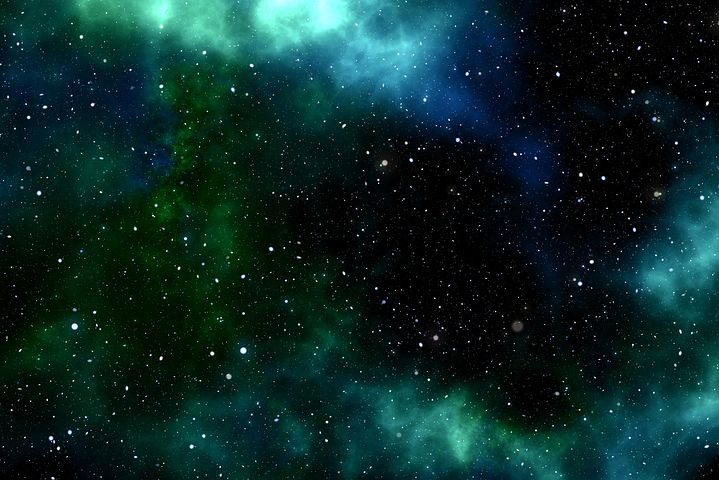

In [50]:
import base64
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object", size = "area_mod",
                 animation_frame="hours", hover_name="object", text = "text",
                 range_x=[df_plot['aphelion'].min() - df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.1],
                 range_y=[-0.2, 0.25],
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"aphelion": "Distance(km)"}
                )
#update text and marker lines
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1,
                              line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'stars.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
fig.show()